# Initialization

In [ ]:
import numpy
import numpy as np
import pandas as pd
from itertools import permutations, combinations
# %matplotlib notebook

import matplotlib.pyplot as plt
from scipy.io import arff
import requests

np.random.seed(1234)

# Getting the data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'

r = requests.get(url, allow_redirects=True)

open('messidor_features.arff', 'wb').write(r.content)
data, melta = arff.loadarff('messidor_features.arff')

messi = pd.DataFrame(data)


url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'

r = requests.get(url, allow_redirects=True)

open('hepatitis.data', 'wb').write(r.content)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names'

r = requests.get(url, allow_redirects=True)

open('hepatitis.names', 'wb').write(r.content)
hepa_names = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG",
              "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT",
              "ALBUMIN", "PROTIME", "HISTOLOGY"]
hepa = pd.DataFrame(pd.read_csv('hepatitis.data', names=hepa_names))



# Clean the data

In [ ]:
temp_messi = messi.columns.tolist()

new_cols = temp_messi[-1:] + temp_messi[:-1]

messi = messi[new_cols]

messi.head()

,Class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,b'0',1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,b'0',1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,b'1',1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,b'0',1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,b'1',1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0


In [ ]:
i = hepa[hepa.eq('?').any(1)].index

hepa = hepa.drop(i)

hepa['Class'] = hepa['Class'] - 1

hepa.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,1,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,1,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,1,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,1,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,1,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


In [ ]:
i = messi[(messi[['12','13','14','15','16']] == 0).any(1)].index

messi = messi.drop(i)

messi = messi.astype(float)

In [ ]:
messi['Class'].describe()

count    384.000000
mean       0.632812
std        0.482667
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [ ]:
hepa['BILIRUBIN'] = hepa['BILIRUBIN'].astype(float)
hepa['ALBUMIN'] = hepa['ALBUMIN'].astype(float)
hepa.iloc[:, 3:14] = hepa.iloc[:, 3:14].astype(int)
hepa.iloc[:, 15:17] = hepa.iloc[:, 15:17].astype(int)
hepa['PROTIME'] = hepa['PROTIME'].astype(float)

[56, 11] [0, 0]


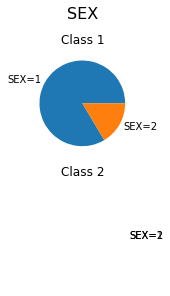

[30, 37] [0, 0]


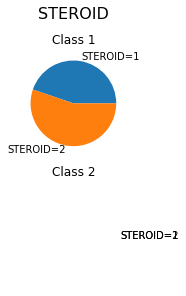

[19, 48] [0, 0]


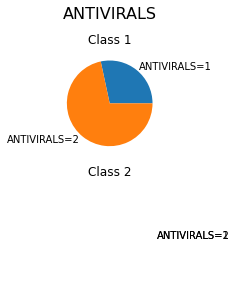

[41, 26] [0, 0]


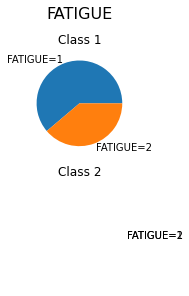

[22, 45] [0, 0]


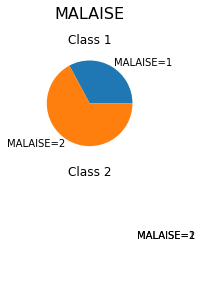

[12, 55] [0, 0]


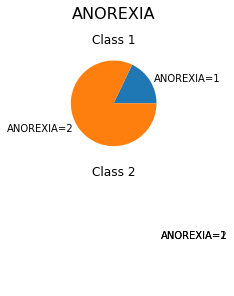

[13, 54] [0, 0]


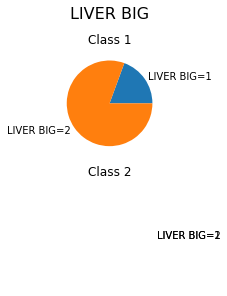

[31, 36] [0, 0]


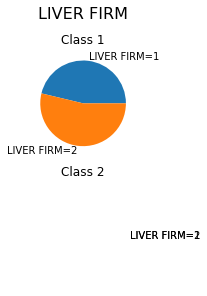

[11, 56] [0, 0]


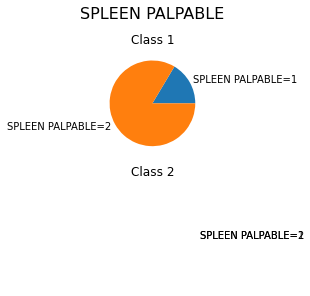

[17, 50] [0, 0]


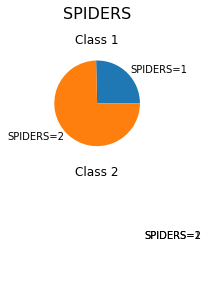

[5, 62] [0, 0]


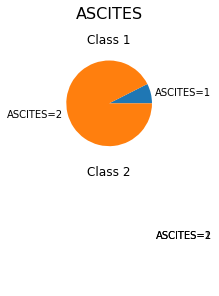

[5, 62] [0, 0]


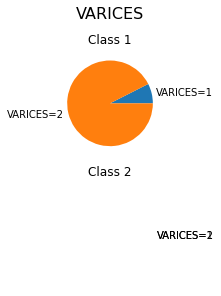

[46, 21] [0, 0]


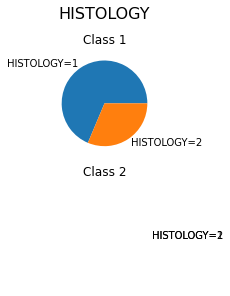

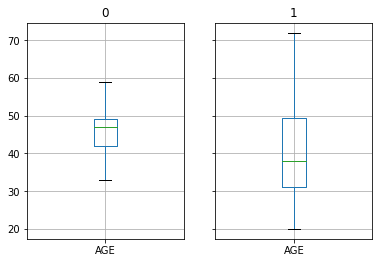

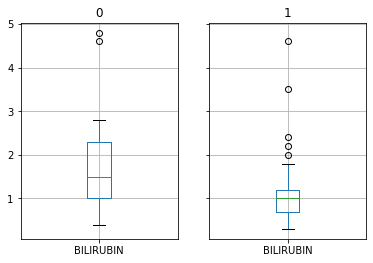

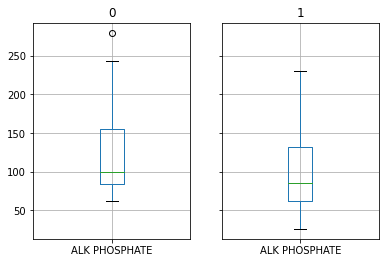

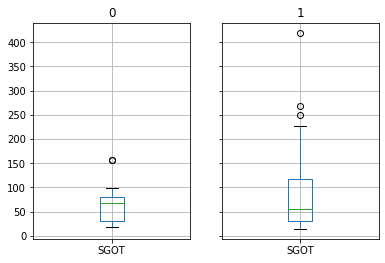

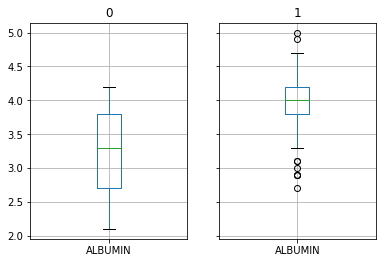

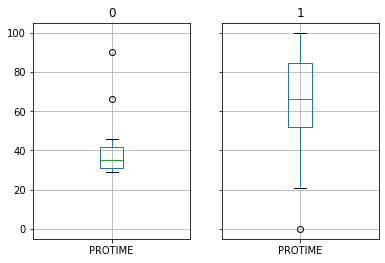

[0, 141] [0, 243]


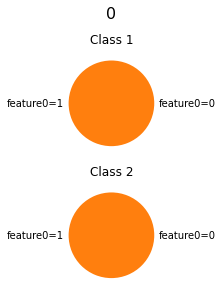

[5, 136] [20, 223]


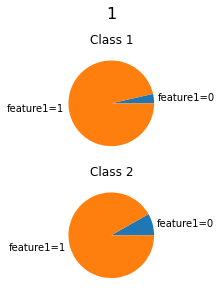

[63, 78] [137, 106]


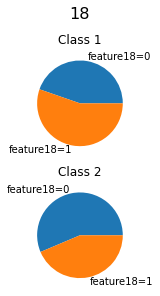

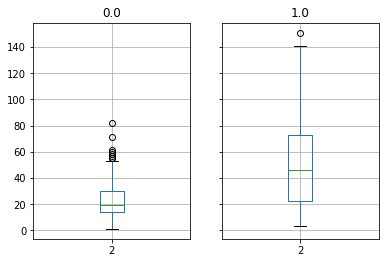

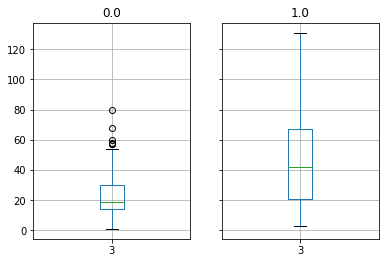

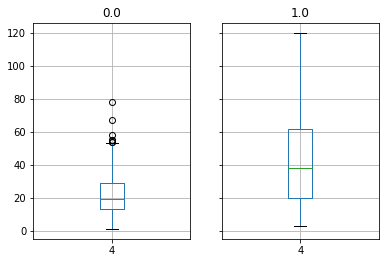

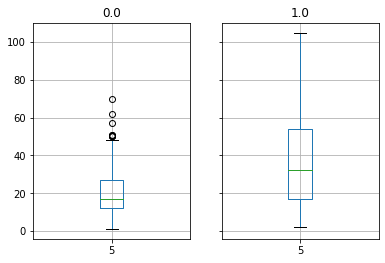

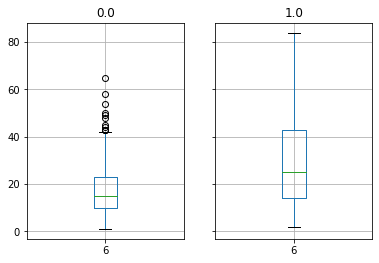

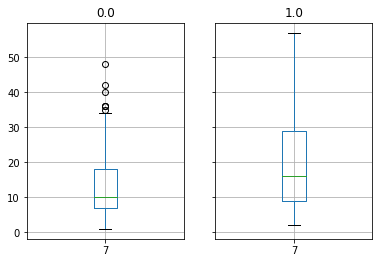

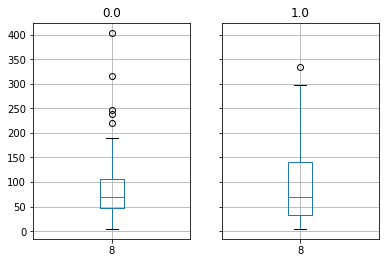

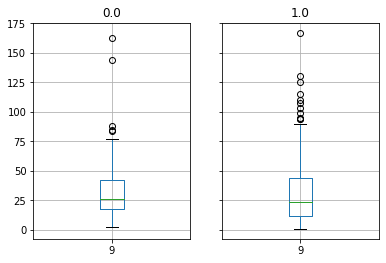

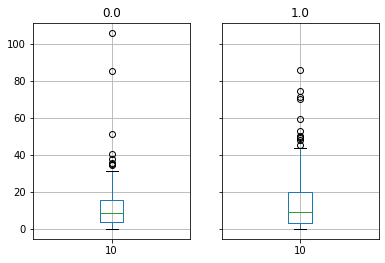

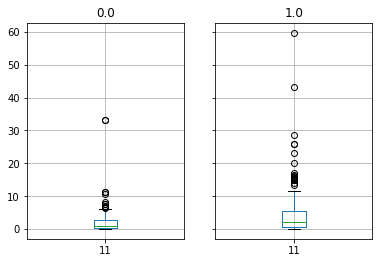

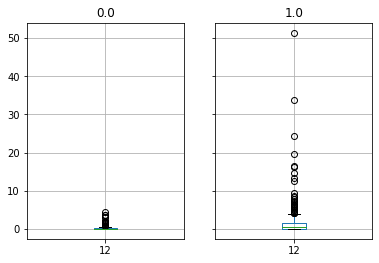

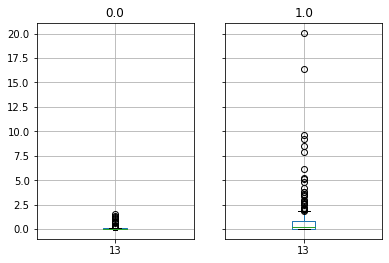

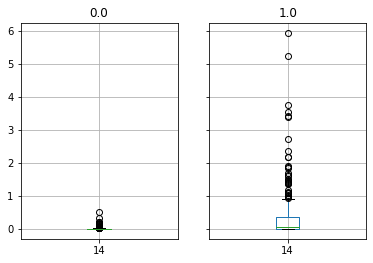

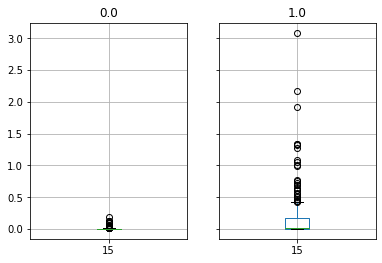

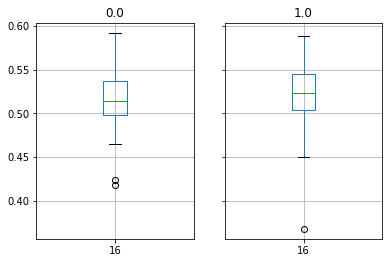

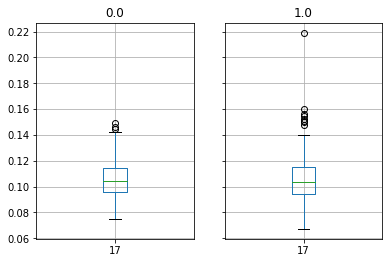

In [ ]:
grouped_hepa = hepa.groupby("Class")
grouped_messi = messi.groupby("Class")
hepa_class1 = hepa[hepa['Class'] == 1]
hepa_class2 = hepa[hepa['Class'] == 2]
hepa_numerical = list(hepa.columns.values[2:14])
hepa_numerical.append(hepa.columns.values[19])
for feature in hepa_numerical:
    h1 = hepa_class1[[feature, 'Class']]
    h2 = hepa_class2[[feature, 'Class']]
    h1_1 = h1[h1[feature] == 1]
    h1_2 = h1[h1[feature] == 2]
    h2_1 = h2[h2[feature] == 1]
    h2_2 = h2[h2[feature] == 2]
    size1 = [len(h1_1), len(h1_2)]
    size2 = [len(h2_1), len(h2_2)]
    print(size1, size2)
    labels = f'{feature}=1', f'{feature}=2'
    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    axs[0].pie(size1, labels=labels)
    axs[0].set_title('Class 1')
    fig.suptitle(f'{feature}', fontsize=16)
    axs[1].pie(size2, labels=labels)
    axs[1].set_title('Class 2')
    plt.show()
for feature in list(hepa.columns.values[1:2])+list(hepa.columns.values[14:19]):
    grouped_hepa.boxplot(column=feature)
    plt.show()


messi_class0 = messi[messi['Class'] == messi['Class'][0]]
messi_class1 = messi[messi['Class'] == messi['Class'][2]]
for feature in list(messi.columns.values[1:3])+['18']:
    m0 = messi_class0[[feature, 'Class']]
    m1 = messi_class1[[feature, 'Class']]
    m0_0 = m0[m0[feature] == np.float64(0)]
    m0_1 = m0[m0[feature] == np.float64(1)]
    m1_0 = m1[m1[feature] == np.float64(0)]
    m1_1 = m1[m1[feature] == np.float64(1)]
    size1 = [len(m0_0), len(m0_1)]
    size2 = [len(m1_0), len(m1_1)]
    print(size1, size2)
    labels = f'feature{feature}=0', f'feature{feature}=1'
    fig1, axs1 = plt.subplots(2, 1, constrained_layout=True)
    axs1[0].pie(size1, labels=labels)
    axs1[0].set_title('Class 1')
    fig1.suptitle(f'{feature}', fontsize=16)
    axs1[1].pie(size2, labels=labels)
    axs1[1].set_title('Class 2')
    plt.show()
for feature in list(messi.columns.values[3:19]):
    grouped_messi.boxplot(column=feature)
    plt.show()

# KNN

In [ ]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

# Decision tree

Data structure

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices  # stores the data indices which are in the region defined by this node
        self.left = None  # stores the left child of the node
        self.right = None  # stores the right child of the node
        self.split_feature = None  # the feature for split at this node
        self.split_value = None  # the value of the feature for split at this node
        self.cost = 0
        self.change = 0
        if parent:
            self.depth = parent.depth + 1  # obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes  # copies the num classes from the parent
            self.data = parent.data  # copies the data from the parent
            self.labels = parent.labels  # copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices],
                                     minlength=self.num_classes)  # this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  # stores the class probability for the node

            # note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


Greedy-spiltting

In [ ]:
def greedy_test(node, cost_fn):
    # initialize the best parameter values
    left_best = 0
    right_best = 0
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    # sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices], axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        # stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:, f]:
            # Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            # we can't have a split where a child has zero element
            # if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            # compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            # get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost) / num_instances
            # update only when a lower cost is encountered
            if cost < best_cost:
                left_best = num_left * left_cost / num_instances
                right_best = num_right * right_cost / num_instances
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value, left_best, right_best

Cost functions

In [ ]:
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    # you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)


# computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[
        class_probs > 0]  # this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))  # expression for entropy -\sigma p(x)log[p(x)]


# computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))  # expression for gini index 1-\sigma p(x)^2


Tree model

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth  # maximum dept for termination
        self.root = None  # stores the root of the decision tree
        self.cost_fn = cost_fn  # stores the cost function of the decision tree
        self.num_classes = num_classes  # stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  # minimum number of instances in a leaf for termination

    def fit(self, data, labels):
        pass  # pass in python 3 means nothing happens and the method here is empty

    def predict(self, data_test):
        pass

    def prune(self, validation_set):
        pass

    def _collect_increase(self, node):
        pass


def prune(self, num_folds=4):
    print(1)
    x = self.root.data
    y = self.root.labels
    num_instances = self.root.data.shape[0]
    node_list, increase_list = self._collect_increase(self.root)
    # create node-increase dictionary
    node_increase = {}
    print(2)
    for k in range(len(node_list)):
        node_increase[node_list[k]] = increase_list[k]
    # sort dictionary by increase in increasing order
    sorted_items = dict(sorted(node_increase.items(), key=lambda item: item[1])).items()
    print(3)
    for node in node_increase.keys():
        if float(node_increase[node]) <= 1e-5:
            node.left = None
            node.right = None
    print(4)
    acc_valid = []
    prune_list = []
    accuracy_list = []
    for (tr, val) in cross_validate_inds(num_instances, num_folds):
        probs_test = self.predict(x[val])
        y_pred = np.argmax(probs_test, 1)
        acc_valid.append(np.sum(y_pred == y[val]) / y[val].shape[0])
    highest_accuracy = np.mean(acc_valid)
    print(5)
    for item in sorted_items:
        node = item[0]
        if node is not self.root:
            prune_list.append((node, node.left, node.right))
            node.left = None
            node.right = None
            acc_valid = []
            for (tr, val) in cross_validate_inds(num_instances, num_folds):
                probs_test = self.predict(x[val])
                y_pred = np.argmax(probs_test, 1)
                acc_valid.append(np.sum(y_pred == y[val]) / y[val].shape[0])
            accuracy_list.append(np.mean(acc_valid))
    highest_accuracy_index = 0
    for k, value in enumerate(accuracy_list):
        if value >= highest_accuracy:
            highest_accuracy = value
            highest_accuracy_index = k
    for j in range(highest_accuracy_index,len(prune_list)):
        prune_list[j][0].left = prune_list[j][1]
        prune_list[j][0].right = prune_list[j][2]
    return


def _collect_increase(self, node):
    node_list = [node]
    increase_list = [node.change]
    i = 0
    if node.left is not None and (not (node.change-0.0) < 1e-3):
        node_list.extend(self._collect_increase(node.left)[0])
        node_list.extend(self._collect_increase(node.right)[0])
        increase_list.extend(self._collect_increase(node.left)[1])
        increase_list.extend(self._collect_increase(node.right)[1])
    return node_list, increase_list


DecisionTree._collect_increase = _collect_increase
DecisionTree.prune = prune


def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    # below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self.root.cost = self.cost_fn(self.root.labels)
    #print(self.root.cost)
    # to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self


def _fit_tree(self, node):
    # This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    # greedily select the best test by minimizing the cost
    sum_cost, split_feature, split_value, left_cost, right_cost = greedy_test(node, self.cost_fn)
    # if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(sum_cost):
        return
    # print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    # to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices, split_feature] <= split_value
    # store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    # define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    left.cost = left_cost
    right.cost = right_cost
    # assign the cost change to this node for its spliting
    node.change = node.cost - sum_cost
    # recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)

    # assign the left and right child to present child
    node.left = left
    node.right = right


DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree


def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        # loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        # the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n, :] = node.class_prob
    return class_probs
DecisionTree.predict = predict

# Cross validation

In [ ]:
def cross_validate_inds(n, n_folds):
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        val_inds = list(range(f * n_val, (f + 1) * n_val))
        if f > 0:
            tr_inds = list(range(f * n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f + 1) * n_val, n))
        yield tr_inds, val_inds

In [ ]:
def cross_validate_dt(num_folds,depth,x,y):
  (num_instances,num_features),num_classes = x.shape, np.max(y)+1
  D_list = range(2,depth+1) 
  cost_function = [cost_misclassification,cost_entropy,cost_gini_index]
  accuracy = []
  for fn in cost_function:
    acc_valid = np.zeros((len(D_list), num_folds))
    for i, D in enumerate(D_list):
      tree = DecisionTree(max_depth=D,cost_fn=fn)
      for f, (tr,val) in enumerate(cross_validate_inds(num_instances,num_folds)):
        probs_test = tree.fit(x[tr],y[tr]).predict(x[val])
        y_pred = np.argmax(probs_test,1)
        acc_valid[i,f] = np.sum(y_pred == y[val])/y[val].shape[0]
    accuracy.append(acc_valid)

  plt.plot(D_list, np.mean(accuracy[0], axis =1), label = 'misclassification')
  plt.plot(D_list, np.mean(accuracy[1], axis =1), label = 'entropy')
  plt.plot(D_list, np.mean(accuracy[2], axis =1), label = 'Gini_index')
  plt.legend()
  plt.xlabel('D (maximum depth)')
  plt.ylabel('Mean accuracy')
  plt.show()


In [ ]:
def cross_validate_dt_leaf_insnum(num_folds,depth,leaf_insnum,x,y):
  (num_instances,num_features),num_classes = x.shape, np.max(y)+1
  leaf_insnum_list = range(1,leaf_insnum) 
  cost_function = [cost_misclassification,cost_entropy,cost_gini_index]
  accuracy = []
  for fn in cost_function:
    acc_valid = np.zeros((len(leaf_insnum_list), num_folds))
    for i, ln in enumerate(leaf_insnum_list):
      tree = DecisionTree(max_depth=depth,cost_fn=fn,min_leaf_instances=ln)
      for f, (tr,val) in enumerate(cross_validate_inds(num_instances,num_folds)):
        probs_test = tree.fit(x[tr],y[tr]).predict(x[val])
        y_pred = np.argmax(probs_test,1)
        acc_valid[i,f] = np.sum(y_pred == y[val])/y[val].shape[0]
    accuracy.append(acc_valid)

  plt.plot(leaf_insnum_list, np.mean(accuracy[0], axis =1), label = 'misclassification')
  plt.plot(leaf_insnum_list, np.mean(accuracy[1], axis =1), label = 'entropy')
  plt.plot(leaf_insnum_list, np.mean(accuracy[2], axis =1), label = 'Gini_index')
  plt.legend()
  plt.xlabel('max leaf instance number')
  plt.ylabel('Mean accuracy')
  plt.show()

In [ ]:
def cross_validate_knn(num_folds,k,x,y):
  (num_instances,num_features),num_classes = x.shape, np.max(y)+1
  K_list = range(1,k+1) 
  dist_function = [euclidean,manhattan]
  accuracy = []
  for df in dist_function:
    acc_valid = np.zeros((len(K_list), num_folds))
    for i, k in enumerate(K_list):
      knn = KNN(K=k, dist_fn=df)
      for f, (tr,val) in enumerate(cross_validate_inds(num_instances,num_folds)):
        probs_test, knns = knn.fit(x[tr],y[tr]).predict(x[val])
        y_pred = np.argmax(probs_test,axis=-1)
        acc_valid[i,f] = np.sum(y_pred == y[val])/y[val].shape[0]
    accuracy.append(acc_valid)

  plt.plot(K_list, np.mean(accuracy[0], axis =1), label = 'euclidean')
  plt.plot(K_list, np.mean(accuracy[1], axis =1), label = 'manhattan')

  plt.legend()
  plt.xlabel('K')
  plt.ylabel('Mean accuracy')
  plt.show()

Helper function for loading data

In [ ]:
def load_data(data,num_fold, selected_feature,select):
  data_np = data.to_numpy()
  x, y = data_np[:, 1:], data_np[:, 0]
  if select == True:
    x = x[:,selected_feature]
  y = y.astype(int)
  (num_instances, num_features), num_classes = x.shape, np.max(y)+1
  n_test = num_instances // num_fold
  inds = np.random.permutation(num_instances)
  x_train, y_train = x[inds[n_test:]], y[inds[n_test:]]
  x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]

  return x,y,x_train, y_train, x_test, y_test, num_classes


# Experiment - hepa

Loading hepa data

set True for select our selected features

> 缩进块



In [ ]:
x,y,x_train, y_train, x_test, y_test, num_classes = load_data(hepa,4,[5,10,11,16,17],False)

KNN model testing:

Compare the accuracy on different parameters(K, dist_function)

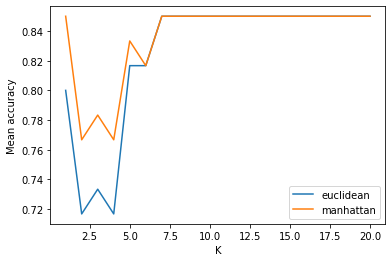

In [ ]:
cross_validate_knn(10,20,x_train,y_train)

KNN model on test data:

In [ ]:
knn = KNN(K=5, dist_fn= euclidean)
probs_test, knns = knn.fit(x_train, y_train).predict(x_test)
#print(x_test)
y_pred = np.argmax(probs_test, axis = -1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy * 100:.1f}')


accuracy is 80.0


Decision tree model:

Compare the accuracy on different parameters (depth, cost function)

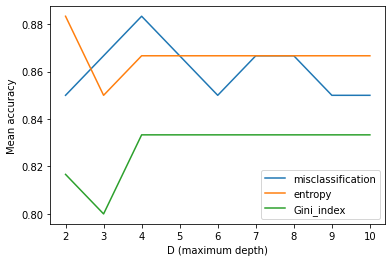

In [ ]:
cross_validate_dt(10,10,x_train,y_train)

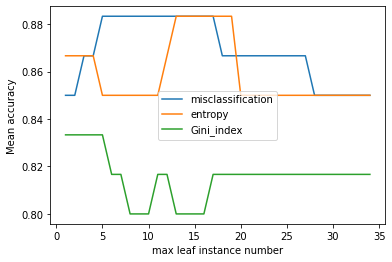

In [ ]:
cross_validate_dt_leaf_insnum(10,10,35,x_train,y_train)

Decision tree model on test data

In [ ]:
tree = DecisionTree(max_depth=5,cost_fn=cost_gini_index)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test, 1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy * 100:.1f}')

accuracy is 85.0


Repeat test on test data with pruned decision tree

prune(n) n<-cross validate num_fold

In [ ]:
tree.prune(4)
probs_test = tree.predict(x_test)
y_pred = np.argmax(probs_test, 1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy * 100:.1f}')

1
2
3
4
5
accuracy is 85.0


# Decision boudary - hepa

In [ ]:
x,y,x_train, y_train, x_test, y_test, num_classes = load_data(hepa,4,[16,17],True)

We then plot the decision boundary for knn

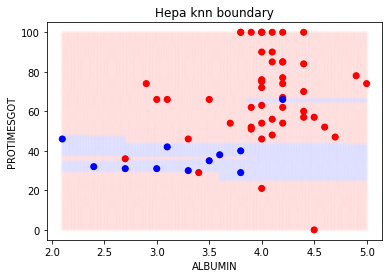

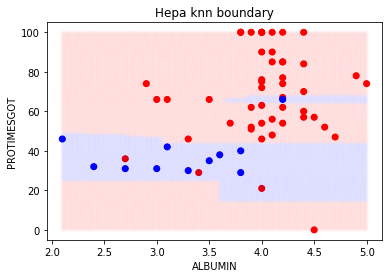

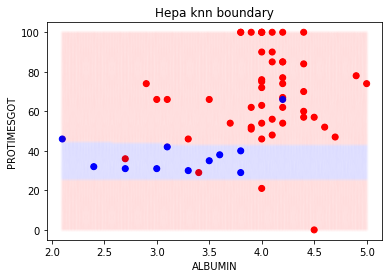

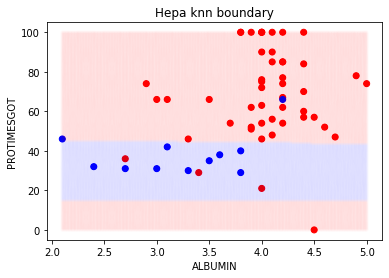

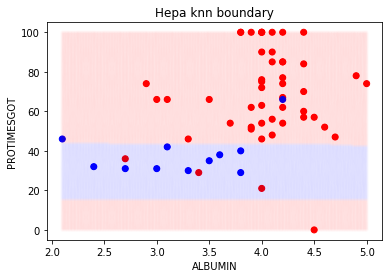

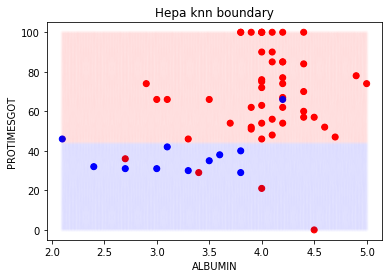

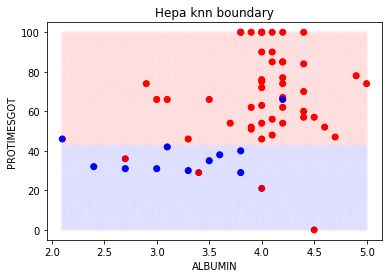

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
for k in range(1,8):
  model_knn = KNN(K=k)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model_knn.fit(x_train, y_train).predict(x_all)
  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
  c1 = []
  for i in range(len(y_train_prob)):
    if y_train_prob[i,0] == 0:
      c1.append("r")
    else:
      c1.append("b")
  c2 = []
  for i in range(len(y_pred_all)):
    if y_pred_all[i,0] == 0:
      c2.append("r")
    else:
      c2.append("b")
  plt.scatter(x_train[:,0], x_train[:,1],c=c1, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1],c=c2, marker='.', alpha=0.01)
  plt.ylabel('PROTIMESGOT')
  plt.xlabel('ALBUMIN')
  plt.title("Hepa knn boundary")
  plt.show()

We then plot the decision boundary for dt

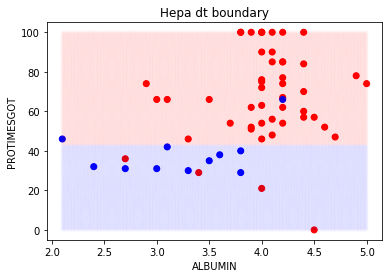

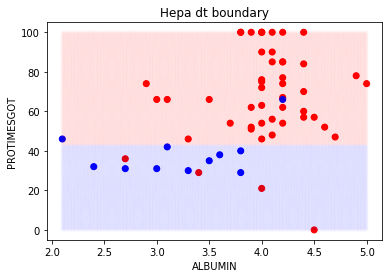

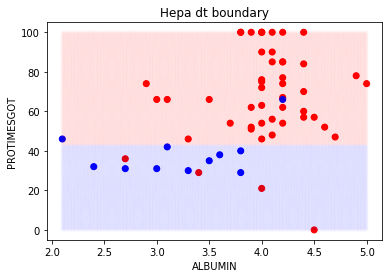

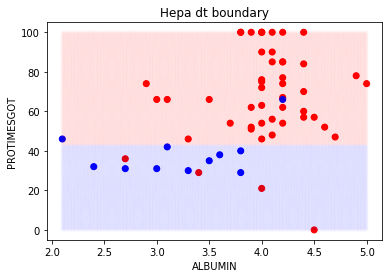

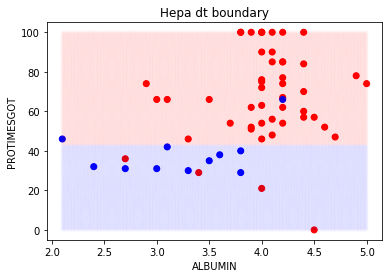

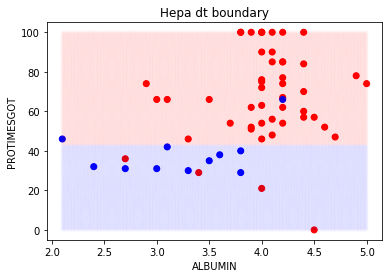

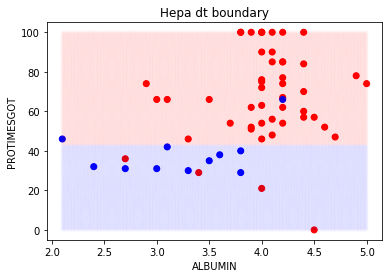

In [ ]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
for i in [20,15,10,5,4,3,2]:
  model_dt = DecisionTree(max_depth=i)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  y_prob_all = model_dt.fit(x_train, y_train).predict(x_all)
  c1 = []
  for i in range(len(y_train_prob)):
    if y_train_prob[i,0] == 0:
      c1.append("r")
    else:
      c1.append("b")
  c2 = []
  for i in range(len(y_pred_all)):
    if y_pred_all[i,0] == 0:
      c2.append("r")
    else:
      c2.append("b")
  plt.scatter(x_train[:,0], x_train[:,1],c=c1,  marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1],c=c2,  marker='.', alpha=.01)
  plt.ylabel('PROTIMESGOT')
  plt.xlabel('ALBUMIN')
  plt.title("Hepa dt boundary")
  plt.show()

# Experiment - messi

Loading messi data

In [ ]:
x,y,x_train, y_train, x_test, y_test, num_classes = load_data(messi,9,[12,13,14,15],False)

KNN model

KNN model - selecting K and dist_fn

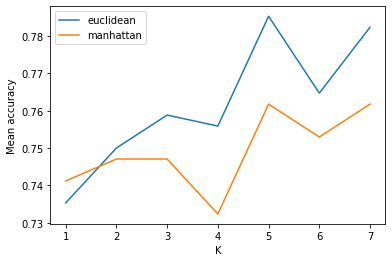

In [ ]:
cross_validate_knn(10,7,x_train,y_train)

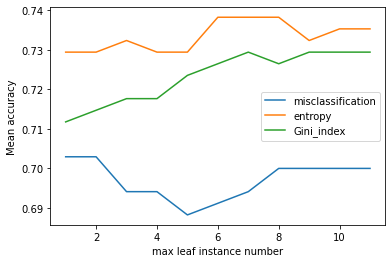

In [ ]:
cross_validate_dt_leaf_insnum(5,10,12,x_train,y_train)

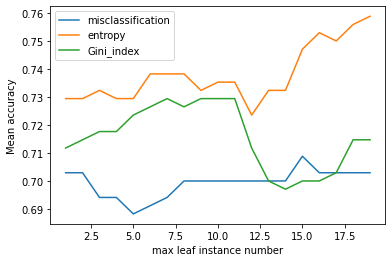

In [ ]:
cross_validate_dt_leaf_insnum(5,10,20,x_train,y_train)

KNN: test data

In [ ]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

In [ ]:
knn = KNN(K=7, dist_fn= euclidean)
probs_test, knns = knn.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test, axis = -1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy * 100:.1f}')

accuracy is 81.0


Deicision tree

Cross validation: selecting depth and cost_fn

In [ ]:
cross_validate_dt(5,10,x_train,y_train)

KeyboardInterrupt: ignored

Decision tree on test data

In [ ]:
tree = DecisionTree(max_depth=5,cost_fn=cost_gini_index)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test, 1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy * 100:.1f}')

# Decision boudary - messi

We then plot the decision boundary for knn

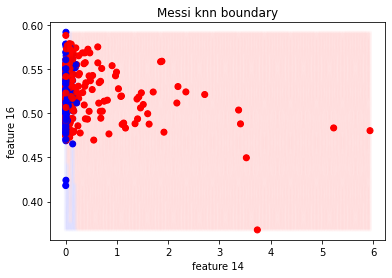

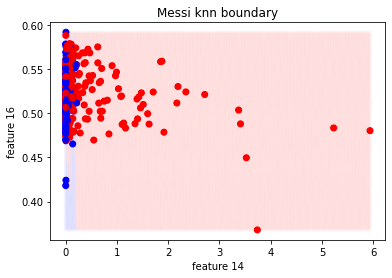

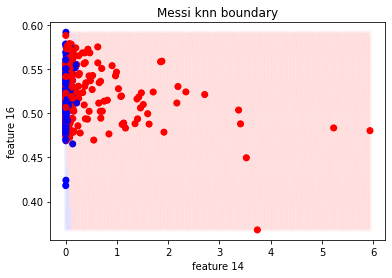

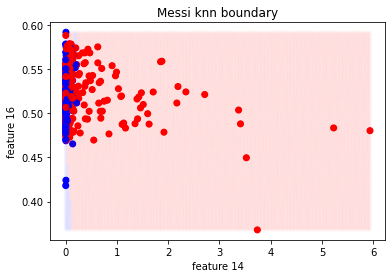

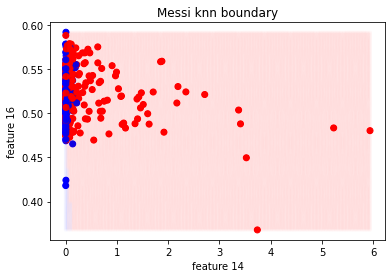

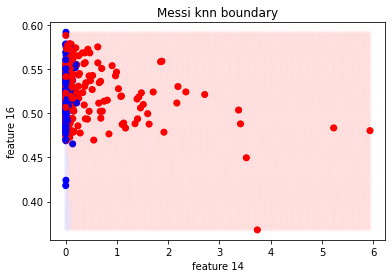

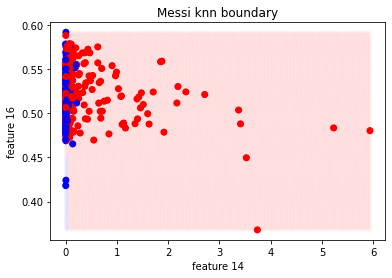

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
for k in range(1,8):
  model_knn = KNN(K=k)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model_knn.fit(x_train, y_train).predict(x_all)
  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
  c1 = []
  for i in range(len(y_train_prob)):
    if y_train_prob[i,0] == 0:
      c1.append("r")
    else:
      c1.append("b")
  c2 = []
  for i in range(len(y_pred_all)):
    if y_pred_all[i,0] == 0:
      c2.append("r")
    else:
      c2.append("b")
  plt.scatter(x_train[:,0], x_train[:,1],c=c1, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1],c=c2, marker='.', alpha=0.01)
  plt.ylabel('feature 16')
  plt.xlabel('feature 14')
  plt.title("Messi knn boundary")
  plt.show()

We then plot the decision boundary for dt

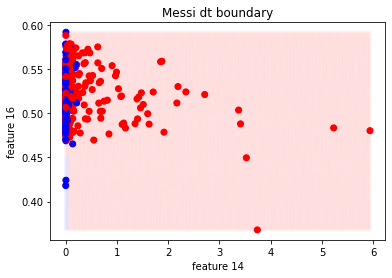

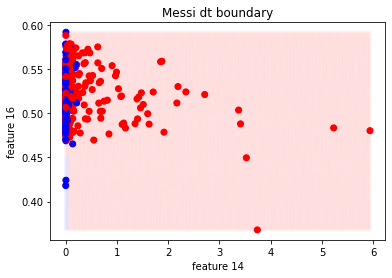

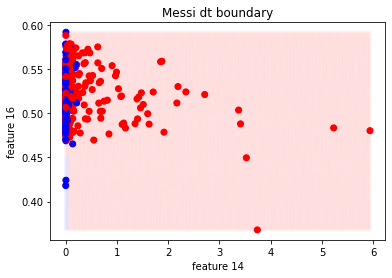

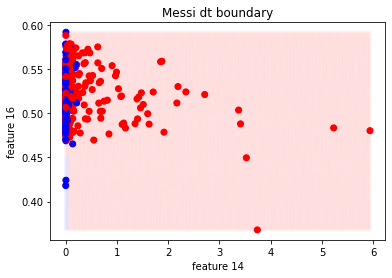

In [ ]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
for i in [20,15,10,5]:
  model_dt = DecisionTree(max_depth=i)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  y_prob_all = model_dt.fit(x_train, y_train).predict(x_all)
  c1 = []
  for i in range(len(y_train_prob)):
    if y_train_prob[i,0] == 0:
      c1.append("r")
    else:
      c1.append("b")
  c2 = []
  for i in range(len(y_pred_all)):
    if y_pred_all[i,0] == 0:
      c2.append("r")
    else:
      c2.append("b")
  plt.scatter(x_train[:,0], x_train[:,1],c=c1,  marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1],c=c2,  marker='.', alpha=.01)
  plt.ylabel('feature 16')
  plt.xlabel('feature 14')
  plt.title("Messi dt boundary")
  plt.show()